/home/tagokeniot/hypo_workspace/randoor/.venv/lib/python3.8/site-packages/quaternion/numba_wrapper.py:23: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


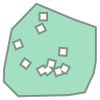

In [1]:
from randoor.generator import ObstacleRoomGenerator
o_generator = ObstacleRoomGenerator()
obs_room = o_generator.generate_new()
obs_room.get_freespace_poly()

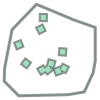

In [2]:
obs_room.get_collision_poly()

In [3]:
from randoor.spawner import geom
from randoor.spawner import poly
from shapely.geometry import Polygon
import numpy as np

p = Polygon(poly.get_square_horizon((0,0), 1, np.pi/4))
samples = geom.sample_from_faces([p, p], 1, 0.01)
samples

array([[[-0.94092807, -0.47762265]],

       [[ 0.97069801, -0.44856952]]])

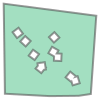

In [4]:
from randoor.generator import SimpleSearchRoomGenerator
ss_generator = SimpleSearchRoomGenerator()
ss_room = ss_generator.generate_new()
ss_room.get_freespace_poly()

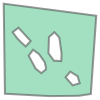

In [5]:
ss_room.get_freezone_poly()

In [6]:
ss_room.obstacle_count, ss_room.target_count

(10, 4)

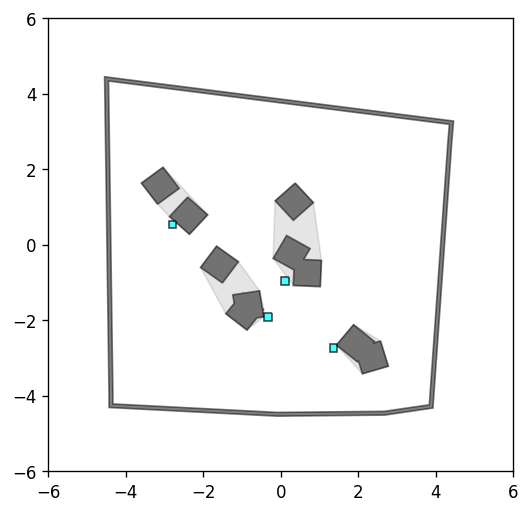

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(0, figsize=(5,5), dpi=120)
ax = fig.add_subplot(111)
plt.xlim(-6,6)
plt.ylim(-6,6)

wall = unary_union(ss_room.polygons[ss_room.tag_wall])
obstacles = unary_union(ss_room.polygons[ss_room.tag_obstacle])
targets = unary_union(ss_room.polygons[ss_room.tag_target])
zones = unary_union(ss_room.obstacle_hulls)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=2))
ax.add_patch(PolygonPatch(zones, fc='black', alpha=0.1, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.7, zorder=4))

plt.show()

In [8]:
from randoor.generator import ChestSearchRoomGenerator
cs_generator = ChestSearchRoomGenerator()
cs_room = cs_generator.generate_new()

In [9]:
cs_room.obstacle_count, cs_room.target_count, cs_room.key_count

(10, 5, 5)

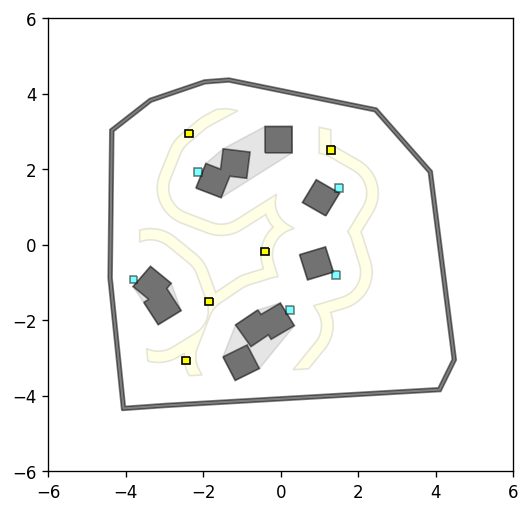

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(0, figsize=(5,5), dpi=120)
ax = fig.add_subplot(111)
plt.xlim(-6,6)
plt.ylim(-6,6)

wall = unary_union(cs_room.polygons[cs_room.tag_wall])
obstacles = unary_union(cs_room.polygons[cs_room.tag_obstacle])
targets = unary_union(cs_room.polygons[cs_room.tag_target])
keys = unary_union(cs_room.polygons[cs_room.tag_key])
obs_zones = unary_union(cs_room.obstacle_hulls)
key_zones = unary_union(cs_room.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=2))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.5, zorder=4))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6))

In [11]:
img = cs_room.get_occupancy_grid(cs_room.get_freespace_poly())
# print(np.reshape(img, (512,512)))
plt.imsave('occupancy_map.png', np.reshape(img, (512,512)), cmap='gray')

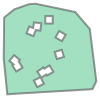

In [12]:
csp = cs_room.get_freespace_poly()
csp

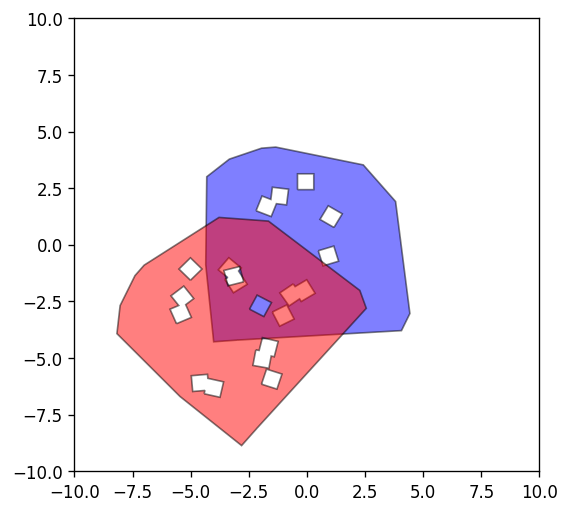

In [17]:
from randoor.spawner import poly
x = 3
y = 3
yaw = np.pi/4
moved_csp = poly.get_moved_poly_tf_rt(csp, -x, -y, yaw)
# moved_csp = get_moved_poly(moved_csp, 0,0,-yaw)

fig = plt.figure(0, figsize=(5,5), dpi=120)
ax = fig.add_subplot(111)
plt.xlim(-10,10)
plt.ylim(-10,10)

ax.add_patch(PolygonPatch(csp, fc='blue', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(moved_csp, fc='red', alpha=0.5, zorder=2))

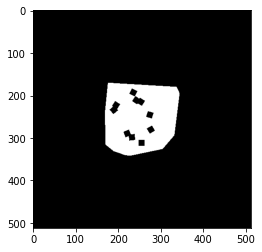

In [14]:
img = cs_room.get_occupancy_grid(cs_room.get_freespace_poly()).reshape([512,512])
plt.imshow(img, cmap='gray')

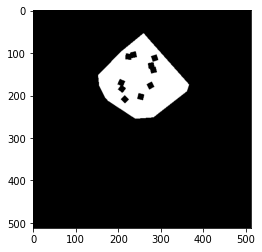

In [15]:
origin_x = 3
origin_y = 3
origin_yaw = np.pi/4
img = cs_room.get_occupancy_grid(cs_room.get_freespace_poly(), (origin_x, origin_y), origin_yaw).reshape([512,512])
plt.imshow(img, cmap='gray')